In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_functions import *
from tqdm import tqdm
from scipy.integrate import solve_ivp

In [48]:
def n_f_dist(n_f,n_p):
    return np.sqrt(np.sum((n_p-n_f)**2))#/np.linalg.norm(n_f)

In [6]:
def evaluate_fitness_controlled(k,K,n_f,lam,lam_c,s_hat,m,t_f):
    dists = []
    for i in range(m):
        lam_p = np.zeros(g) 
        #idx = np.random.randint(5)
        lam_p[i] = lam_p[i]+2
        nt, t = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)
        dists.append(n_f_dist(n_f,nt[:,-1]))
    return np.mean(dists)

In [7]:
def calc_dndt_controlled(k,K,n,n_f,lam,lam_p,lam_c,s_hat):
    s = np.dot(s_hat,n - n_f)
    return np.matmul(k*(np.outer(np.ones(len(n)),n)+ K)**(-1),n) - lam*n - lam_p*n - s*lam_c*n

In [8]:
def sim_dyn(n0,t_f,k,K,lam):
    def dndt(t,n):
        output = calc_dndt(k,K,n,lam)
        return output
    t_span = [0, t_f]  # Time span to solve the differential equation
    rtol = 1e-6  # Relative tolerance for the solution
    atol = 1e-9  # Absolute tolerance for the solution
    sol = solve_ivp(dndt, t_span, n0, rtol=rtol, atol=atol, dense_output=True, method='Radau')

    # Create an interpolating function for the solution
    sol_fun = sol.sol

    # Evaluate the solution at a large number of time points for plotting
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    n_eval = sol_fun(t_eval)
    return n_eval, t_eval

In [9]:
def sim_dyn_controlled(n0,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat):
    def dndt(t,n):
        output = calc_dndt_controlled(k,K,n,n_f,lam,lam_p,lam_c,s_hat)
        return output
    t_span = [0, t_f]  # Time span to solve the differential equation
    rtol = 1e-6  # Relative tolerance for the solution
    atol = 1e-9  # Absolute tolerance for the solution
    sol = solve_ivp(dndt, t_span, n0, rtol=rtol, atol=atol, dense_output=True, method='Radau')

    # Create an interpolating function for the solution
    sol_fun = sol.sol

    # Evaluate the solution at a large number of time points for plotting
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    n_eval = sol_fun(t_eval)
    return n_eval, t_eval

In [10]:
def plot_eigenvectors(v,nt,n_f):
    for i in range(0,3):#v.shape[0]):
        v_plot = np.dot(v[:,i],nt)
        n_f_v = np.dot(v[:,i],n_f)
        #v_plot = v_plot - v_plot[-1]
        v_plot = v_plot - n_f_v
        if i == 0:
            plt.plot(t,v_plot,'--',label = 'Slow Mode')
            plt.legend()
        else:
            plt.plot(t,v_plot)

In [133]:
k = np.genfromtxt('sim_params/k_no_slow_modes.csv', delimiter=',')
K = np.genfromtxt('sim_params/kk_no_slow_modes.csv', delimiter=',')
lam_c = np.genfromtxt('sim_params/lam_c_no_slow_modes.csv', delimiter=',')
s_hat = np.genfromtxt('sim_params/s_hat_no_slow_modes.csv', delimiter=',')
lam = 5
g = k.shape[0]
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]

In [141]:
k = np.genfromtxt('sim_params/k.csv', delimiter=',')
K = np.genfromtxt('sim_params/kk.csv', delimiter=',')
lam_c = np.genfromtxt('sim_params/lam_c_sm.csv', delimiter=',')
s_hat = np.genfromtxt('sim_params/s_hat_sm.csv', delimiter=',')
lam = 5
g = k.shape[0]
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]

In [123]:
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

In [124]:
w

array([-0.05547437+0.j        , -1.75056224+0.j        ,
       -8.61523056+0.j        , -8.52868412+0.j        ,
       -8.34533042+0.j        , -2.20731513+0.j        ,
       -2.64205349+0.06921283j, -2.64205349-0.06921283j,
       -7.66727709+0.j        , -3.24336915+0.25019773j,
       -3.24336915-0.25019773j, -7.0583151 +0.15534574j,
       -7.0583151 -0.15534574j, -6.86310062+0.j        ,
       -3.51673045+0.j        , -3.60827939+0.j        ,
       -4.06373378+0.22516436j, -4.06373378-0.22516436j,
       -6.30550028+0.10187319j, -6.30550028-0.10187319j,
       -4.67191992+0.60230075j, -4.67191992-0.60230075j,
       -5.91954174+0.20420358j, -5.91954174-0.20420358j,
       -5.63019487+0.34842961j, -5.63019487-0.34842961j,
       -4.6282307 +0.j        , -4.91106839+0.j        ,
       -5.11672994+0.21350561j, -5.11672994-0.21350561j])

In [92]:
t_f = 150
delta = 20
lam_p = np.zeros(g) 
i = 3
lam_p[i] = lam_p[i]+delta
nt, t = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,np.zeros(g),s_hat)
lam_p = np.zeros(g) 
lam_p[i] = lam_p[i]+delta
nt_c, t_c = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)

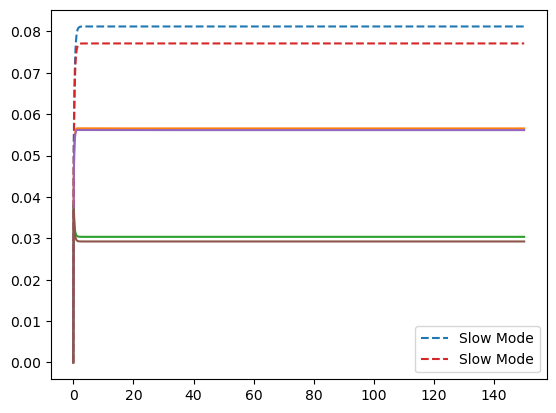

In [93]:
plot_eigenvectors(v,nt,n_f)
plot_eigenvectors(v,nt_c,n_f)

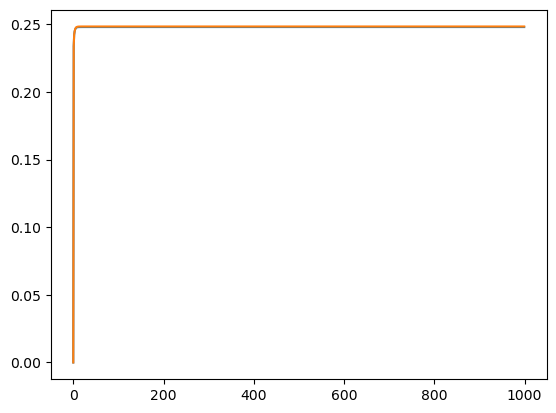

In [94]:
plt.plot([n_f_dist(n_f,nt_c[:,i]) for i in range(len(nt_c[0,:]))])
plt.plot([n_f_dist(n_f,nt[:,i]) for i in range(len(nt_c[0,:]))])

In [95]:
n_f_dist(n_f,nt[:,-1])

0.24832439120125477

In [142]:
controlled_dists = []
uncontrolled_dists = []
for i in tqdm(range(0,30)):
    for delta in np.arange(1,4,0.05):
        t_f = 300
        lam_p = np.zeros(g) 
        lam_p[i] = lam_p[i]+delta
        nt, t = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,np.zeros(g),s_hat)
        uncontrolled_dists.append(n_f_dist(n_f,nt[:,-1]))

        lam_p = np.zeros(g) 
        lam_p[i] = lam_p[i]+delta
        nt_c, t_c = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)
        controlled_dists.append(n_f_dist(n_f,nt_c[:,-1]))

100%|███████████████████████████████████████████| 30/30 [02:23<00:00,  4.80s/it]


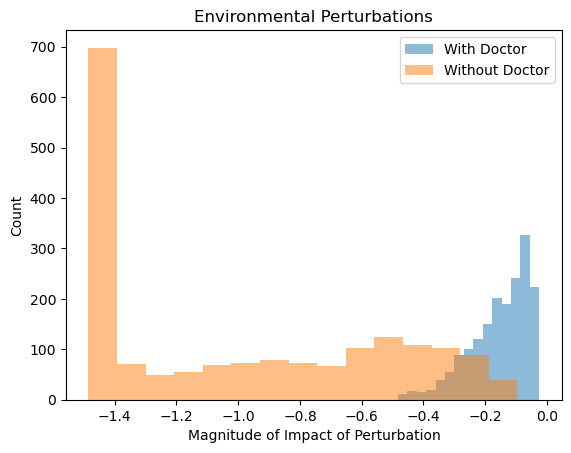

In [144]:
plt.hist(-1*np.array(controlled_dists)/np.mean(uncontrolled_dists),alpha = 0.5,bins = 15,label = 'With Doctor')
plt.hist(-1*np.array(uncontrolled_dists)/np.mean(uncontrolled_dists),alpha = 0.5,bins = 15,label = 'Without Doctor')
plt.xlabel('Magnitude of Impact of Perturbation')
plt.title('Environmental Perturbations')
plt.ylabel('Count')
plt.savefig("env_sm.svg", format = 'svg', dpi=300)
plt.legend()

In [134]:
mut_controlled_dists = []
mut_uncontrolled_dists = []
for i in tqdm(range(1000)):
    k_p = np.array(k)
    mut_idx = np.random.randint(len(np.nonzero(k_p)[0]))
    k_p[np.nonzero(k_p)[0][mut_idx],np.nonzero(k_p)[1][mut_idx]] = k_p[np.nonzero(k_p)[0][mut_idx],np.nonzero(k_p)[1][mut_idx]]*10**(2*np.random.rand()-1)

    lam_p = np.zeros(g) 

    nt, t = sim_dyn_controlled(n_f,t_f,k_p,K,n_f,lam,lam_p,np.zeros(g)  ,s_hat)

    nt_c, t_c = sim_dyn_controlled(n_f,t_f,k_p,K,n_f,lam,lam_p,lam_c ,s_hat)
    mut_controlled_dists.append(n_f_dist(n_f,nt_c[:,-1]))
    mut_uncontrolled_dists.append(n_f_dist(n_f,nt[:,-1]))

100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.93it/s]


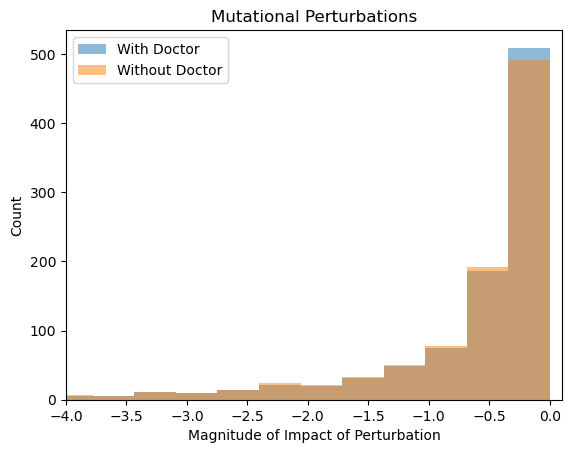

In [135]:


plt.hist(-1*np.array(mut_controlled_dists)/np.mean(mut_uncontrolled_dists),alpha = 0.5,bins = 40,label = 'With Doctor')
plt.hist(-1*np.array(mut_uncontrolled_dists)/np.mean(mut_uncontrolled_dists),alpha = 0.5,bins = 40,label = 'Without Doctor')
plt.xlabel('Magnitude of Impact of Perturbation')
plt.title('Mutational Perturbations')
plt.ylabel('Count')
plt.legend()
plt.xlim((-4,.1))
plt.savefig("mut_no_sm.svg", format = 'svg', dpi=300)

In [129]:
mut_controlled_dists

[5.974277248359838e-05,
 0.00013416220277699215,
 0.0002706392582773818,
 0.0019073772226969477,
 0.0009123289382064739,
 0.0013996019775793583,
 0.0003770420870746634,
 0.004443002311959171,
 0.0001009916656253724,
 0.010278079733057591,
 2.612476422306996e-06,
 0.0019381592940006455,
 0.0015580427356436761,
 0.0001669897006711092,
 0.00018646543042811822,
 0.000995856960702784,
 0.002248737500813115,
 0.01180419840055054,
 0.0007765644799756712,
 0.00036797107788936095,
 4.4424913964957915e-05,
 0.0002151338979528958,
 0.0003398128663927562,
 0.00039218554029144,
 0.0016037303372237494,
 0.00033448043220862567,
 0.0025684278834323675,
 0.007151756176270998,
 0.002324138249906295,
 0.0009571366395543439,
 0.0020570265166930135,
 8.09141465431066e-05,
 0.00027861683827583316,
 0.00491029647215163,
 0.003042556308581442,
 0.004767304194415644,
 0.0036696580640474936,
 0.003053627764269171,
 0.0017894242469554268,
 0.011287251947822409,
 0.0024224394464527677,
 0.0032806615796374446,
 8.